# EDA

### Begin with the setup

In [42]:
import sklearn
print(sklearn.__version__)

1.6.0


In [43]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os # provides functions for interacting with operating system
from dotenv import load_dotenv # reads key-value pairs from a .env file and can set them as environment variables
from sqlalchemy import create_engine # for creating an engine
from math import radians, sin, cos, sqrt, atan2

from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [44]:

load_dotenv() # takes environment variables from .env

DATABASE = os.getenv('DATABASE')
USER_DB = os.getenv('USER_DB')
PASSWORD = os.getenv('PASSWORD')
HOST = os.getenv('HOST')
PORT = os.getenv('PORT')

# Retrieving Data from the DB
DB_STRING = os.getenv('DB_STRING') # gets database string DB_STRING from .env file and assigns it as value for new variable DB_STRING
db = create_engine(DB_STRING) # creates engine from database string DB_STRING




### DB Import and Save to CSV

In [45]:
### DB IMPORT HERE ###
## Use SQL string to join tables on house_id and id
#query_string = "SELECT * FROM EDA.king_county_house_sales kchs JOIN EDA.king_county_house_details kchd ON kchs.house_id = kchd.id;" 

#df = pd.read_sql(query_string, db) # read queried data from SQL database into pandas dataframe
#df.to_csv('King_County_House_prices_dataset.csv',index=False) # export the data to a csv-file

df = pd.read_csv('data/King_County_House_prices_dataset.csv')


df


,date,price,house_id,id,id.1,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.000,7129300520,1,7129300520,3.000,1.000,1180.000,5650.000,1.000,...,7,1180.000,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000
1,2014-12-09,538000.000,6414100192,2,6414100192,3.000,2.250,2570.000,7242.000,2.000,...,7,2170.000,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000
2,2015-02-25,180000.000,5631500400,3,5631500400,2.000,1.000,770.000,10000.000,1.000,...,6,770.000,0.000,1933,NaN,98028,47.738,-122.233,2720.000,8062.000
3,2014-12-09,604000.000,2487200875,4,2487200875,4.000,3.000,1960.000,5000.000,1.000,...,7,1050.000,910.000,1965,0.000,98136,47.521,-122.393,1360.000,5000.000
4,2015-02-18,510000.000,1954400510,5,1954400510,3.000,2.000,1680.000,8080.000,1.000,...,8,1680.000,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000.000,263000018,21593,263000018,3.000,2.500,1530.000,1131.000,3.000,...,8,1530.000,0.000,2009,0.000,98103,47.699,-122.346,1530.000,1509.000
21593,2015-02-23,400000.000,6600060120,21594,6600060120,4.000,2.500,2310.000,5813.000,2.000,...,8,2310.000,0.000,2014,0.000,98146,47.511,-122.362,1830.000,7200.000
21594,2014-06-23,402101.000,1523300141,21595,1523300141,2.000,0.750,1020.000,1350.000,2.000,...,7,1020.000,0.000,2009,0.000,98144,47.594,-122.299,1020.000,2007.000
21595,2015-01-16,400000.000,291310100,21596,291310100,3.000,2.500,1600.000,2388.000,2.000,...,8,1600.000,0.000,2004,0.000,98027,47.535,-122.069,1410.000,1287.000


### DB Analysis

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   house_id       21597 non-null  int64  
 3   id             21597 non-null  int64  
 4   id.1           21597 non-null  int64  
 5   bedrooms       21597 non-null  float64
 6   bathrooms      21597 non-null  float64
 7   sqft_living    21597 non-null  float64
 8   sqft_lot       21597 non-null  float64
 9   floors         21597 non-null  float64
 10  waterfront     19206 non-null  float64
 11  view           21534 non-null  float64
 12  condition      21597 non-null  int64  
 13  grade          21597 non-null  int64  
 14  sqft_above     21597 non-null  float64
 15  sqft_basement  21145 non-null  float64
 16  yr_built       21597 non-null  int64  
 17  yr_renovated   17749 non-null  float64
 18  zipcod

In [47]:
df.describe()

,price,house_id,id,id.1,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19206.000,...,21597.000,21597.000,21145.000,21597.000,17749.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,540296.574,4580474287.771,10799.000,4580474287.771,3.373,2.116,2080.322,15099.409,1.494,0.008,...,7.658,1788.597,291.857,1971.000,836.651,98077.952,47.560,-122.214,1986.620,12758.284
std,367368.140,2876735715.748,6234.661,2876735715.748,0.926,0.769,918.106,41412.637,0.540,0.087,...,1.173,827.760,442.491,29.375,4000.111,53.513,0.139,0.141,685.230,27274.442
min,78000.000,1000102.000,1.000,1000102.000,1.000,0.500,370.000,520.000,1.000,0.000,...,3.000,370.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,322000.000,2123049175.000,5400.000,2123049175.000,3.000,1.750,1430.000,5040.000,1.000,0.000,...,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,450000.000,3904930410.000,10799.000,3904930410.000,3.000,2.250,1910.000,7618.000,1.500,0.000,...,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000
75%,645000.000,7308900490.000,16198.000,7308900490.000,4.000,2.500,2550.000,10685.000,2.000,0.000,...,8.000,2210.000,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,7700000.000,9900000190.000,21597.000,9900000190.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,...,13.000,9410.000,4820.000,2015.000,20150.000,98199.000,47.778,-121.315,6210.000,871200.000


### Clean Up Data

In [53]:
## Time to clean the df up

# Make NAN into 0 and make column int instead of float
df['yr_renovated'] = df['yr_renovated'].fillna(0)
df['yr_renovated'] = df['yr_renovated'].astype(int)

# Will strip off 0s at the end of the years that were originally in the df
df['yr_renovated'] = df['yr_renovated'].apply(lambda x: int(str(x).rstrip('0')) if x > 0 else int(x))

df

,date,price,house_id,id,id.1,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.000,7129300520,1,7129300520,3.000,1.000,1180.000,5650.000,1.000,...,7,1180.000,0.000,1955,0,98178,47.511,-122.257,1340.000,5650.000
1,2014-12-09,538000.000,6414100192,2,6414100192,3.000,2.250,2570.000,7242.000,2.000,...,7,2170.000,400.000,1951,1991,98125,47.721,-122.319,1690.000,7639.000
2,2015-02-25,180000.000,5631500400,3,5631500400,2.000,1.000,770.000,10000.000,1.000,...,6,770.000,0.000,1933,0,98028,47.738,-122.233,2720.000,8062.000
3,2014-12-09,604000.000,2487200875,4,2487200875,4.000,3.000,1960.000,5000.000,1.000,...,7,1050.000,910.000,1965,0,98136,47.521,-122.393,1360.000,5000.000
4,2015-02-18,510000.000,1954400510,5,1954400510,3.000,2.000,1680.000,8080.000,1.000,...,8,1680.000,0.000,1987,0,98074,47.617,-122.045,1800.000,7503.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000.000,263000018,21593,263000018,3.000,2.500,1530.000,1131.000,3.000,...,8,1530.000,0.000,2009,0,98103,47.699,-122.346,1530.000,1509.000
21593,2015-02-23,400000.000,6600060120,21594,6600060120,4.000,2.500,2310.000,5813.000,2.000,...,8,2310.000,0.000,2014,0,98146,47.511,-122.362,1830.000,7200.000
21594,2014-06-23,402101.000,1523300141,21595,1523300141,2.000,0.750,1020.000,1350.000,2.000,...,7,1020.000,0.000,2009,0,98144,47.594,-122.299,1020.000,2007.000
21595,2015-01-16,400000.000,291310100,21596,291310100,3.000,2.500,1600.000,2388.000,2.000,...,8,1600.000,0.000,2004,0,98027,47.535,-122.069,1410.000,1287.000


In [56]:
## Checking columns like sqft_x to see if there are values in the float other than pure int
## For example: price, sqft_living, sqft_lot, sqft_above, sqft_basement, sqft_living15, sqft_lot15

## Uncomment to run

## Had error with sqft_basement and found NAN values
df['sqft_basement'] = df['sqft_basement'].fillna(0)
df['sqft_basement'] = df['sqft_basement'].astype(int)

df['has_decimal'] = df['price'].apply(lambda x: (x - int(x)) != 0)
df['has_decimal'] = df['sqft_living'].apply(lambda x: (x - int(x)) != 0)
df['has_decimal'] = df['sqft_lot'].apply(lambda x: (x - int(x)) != 0)
df['has_decimal'] = df['sqft_above'].apply(lambda x: (x - int(x)) != 0)
df['has_decimal'] = df['floors'].apply(lambda x: (x - int(x)) != 0)
df['has_decimal'] = df['bedrooms'].apply(lambda x: (x - int(x)) != 0)
df['has_decimal'] = df['bathrooms'].apply(lambda x: (x - int(x)) != 0)
df['has_decimal'] = df['sqft_basement'].apply(lambda x: (x - int(x)) != 0)
df['has_decimal'] = df['sqft_living15'].apply(lambda x: (x - int(x)) != 0)
df['has_decimal'] = df['sqft_lot15'].apply(lambda x: (x - int(x)) != 0)

# Filter rows with non-zero decimal parts
rows_with_decimals = df[df['has_decimal']]

print(rows_with_decimals)


## There are 2078 entries with floors with .5
## 14898 entries with bathrooms like 2.25 or .75


Empty DataFrame
Columns: [date, price, house_id, id, id.1, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15, has_decimal]
Index: []

[0 rows x 24 columns]


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   house_id       21597 non-null  int64  
 3   id             21597 non-null  int64  
 4   id.1           21597 non-null  int64  
 5   bedrooms       21597 non-null  float64
 6   bathrooms      21597 non-null  float64
 7   sqft_living    21597 non-null  float64
 8   sqft_lot       21597 non-null  float64
 9   floors         21597 non-null  float64
 10  waterfront     19206 non-null  float64
 11  view           21534 non-null  float64
 12  condition      21597 non-null  int64  
 13  grade          21597 non-null  int64  
 14  sqft_above     21597 non-null  float64
 15  sqft_basement  21597 non-null  int64  
 16  yr_built       21597 non-null  int64  
 17  yr_renovated   21597 non-null  int64  
 18  zipcod

In [60]:
## Columns that need to be ints: 
## price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, sqft_above, sqft_basement, sqft_living15, sqft_lot15

# Columns to convert from float to int
columns_to_convert = [
    'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
    'waterfront', 'view', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15'
]

# Convert specified columns to integer type
#df[columns_to_convert] = df[columns_to_convert].fillna(0).astype(int)


#df = df.drop(columns=('has_decimal'))

## Made zipcode into a string after reading some articles on how to use them
#df['zipcode'] = df['zipcode'].astype(str)
## Didnt use these, but thought about their usage
#df['condition'] = df['condition'].astype(int)
#df['grade'] = df['grade'].astype(int)

print(df.dtypes)  # Check the data types

date              object
price              int64
house_id           int64
id                 int64
id.1               int64
bedrooms           int64
bathrooms          int64
sqft_living        int64
sqft_lot           int64
floors             int64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [62]:
#df['date']

## DROP ID TABLES
#df.drop(["id", "id.1"], axis=1, inplace=True)

df['total_roooms'] = df['bedrooms'] + df['bathrooms']
df['total_sqft'] = df['sqft_living'] + df['sqft_lot']
df['total_sqft15'] = df['sqft_living15'] + df['sqft_lot15']

df.head()


,date,price,house_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,total_roooms,total_sqft,total_sqft15
0,2014-10-13,221900,7129300520,3,1,1180,5650,1,0,0,...,1955,0,98178,47.511,-122.257,1340,5650,4,6830,6990
1,2014-12-09,538000,6414100192,3,2,2570,7242,2,0,0,...,1951,1991,98125,47.721,-122.319,1690,7639,5,9812,9329
2,2015-02-25,180000,5631500400,2,1,770,10000,1,0,0,...,1933,0,98028,47.738,-122.233,2720,8062,3,10770,10782
3,2014-12-09,604000,2487200875,4,3,1960,5000,1,0,0,...,1965,0,98136,47.521,-122.393,1360,5000,7,6960,6360
4,2015-02-18,510000,1954400510,3,2,1680,8080,1,0,0,...,1987,0,98074,47.617,-122.045,1800,7503,5,9760,9303


### TESTING PLOTS

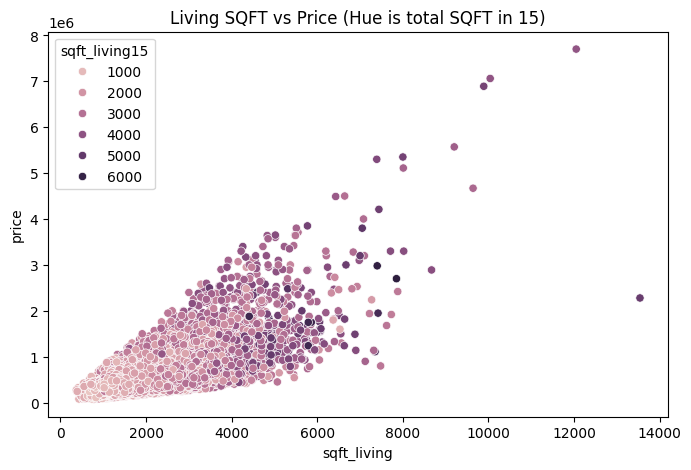

In [63]:
ax = plt.subplot()
"""
sns.scatterplot(data=df, y='price', x='total_sqft', hue='total_sqft15' , ax=ax)
plt.title(
    label='Total SQFT vs Price (Hue is total SQFT in 15)'
)
"""
sns.scatterplot(data=df, y='price', x='sqft_living', hue='sqft_living15', ax=ax)
plt.title(
    label='Living SQFT vs Price (Hue is total SQFT in 15)'
)




plt.show()

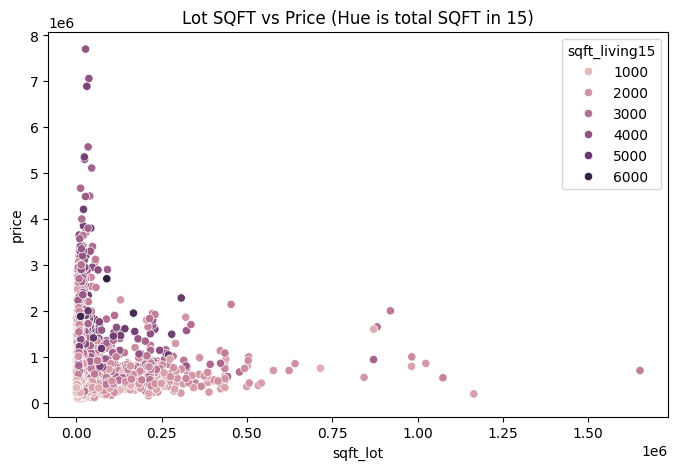

In [64]:
sns.scatterplot(data=df, x='sqft_lot', y='price', hue='sqft_living15')
plt.title(
    label='Lot SQFT vs Price (Hue is total SQFT in 15)'
)

plt.show()



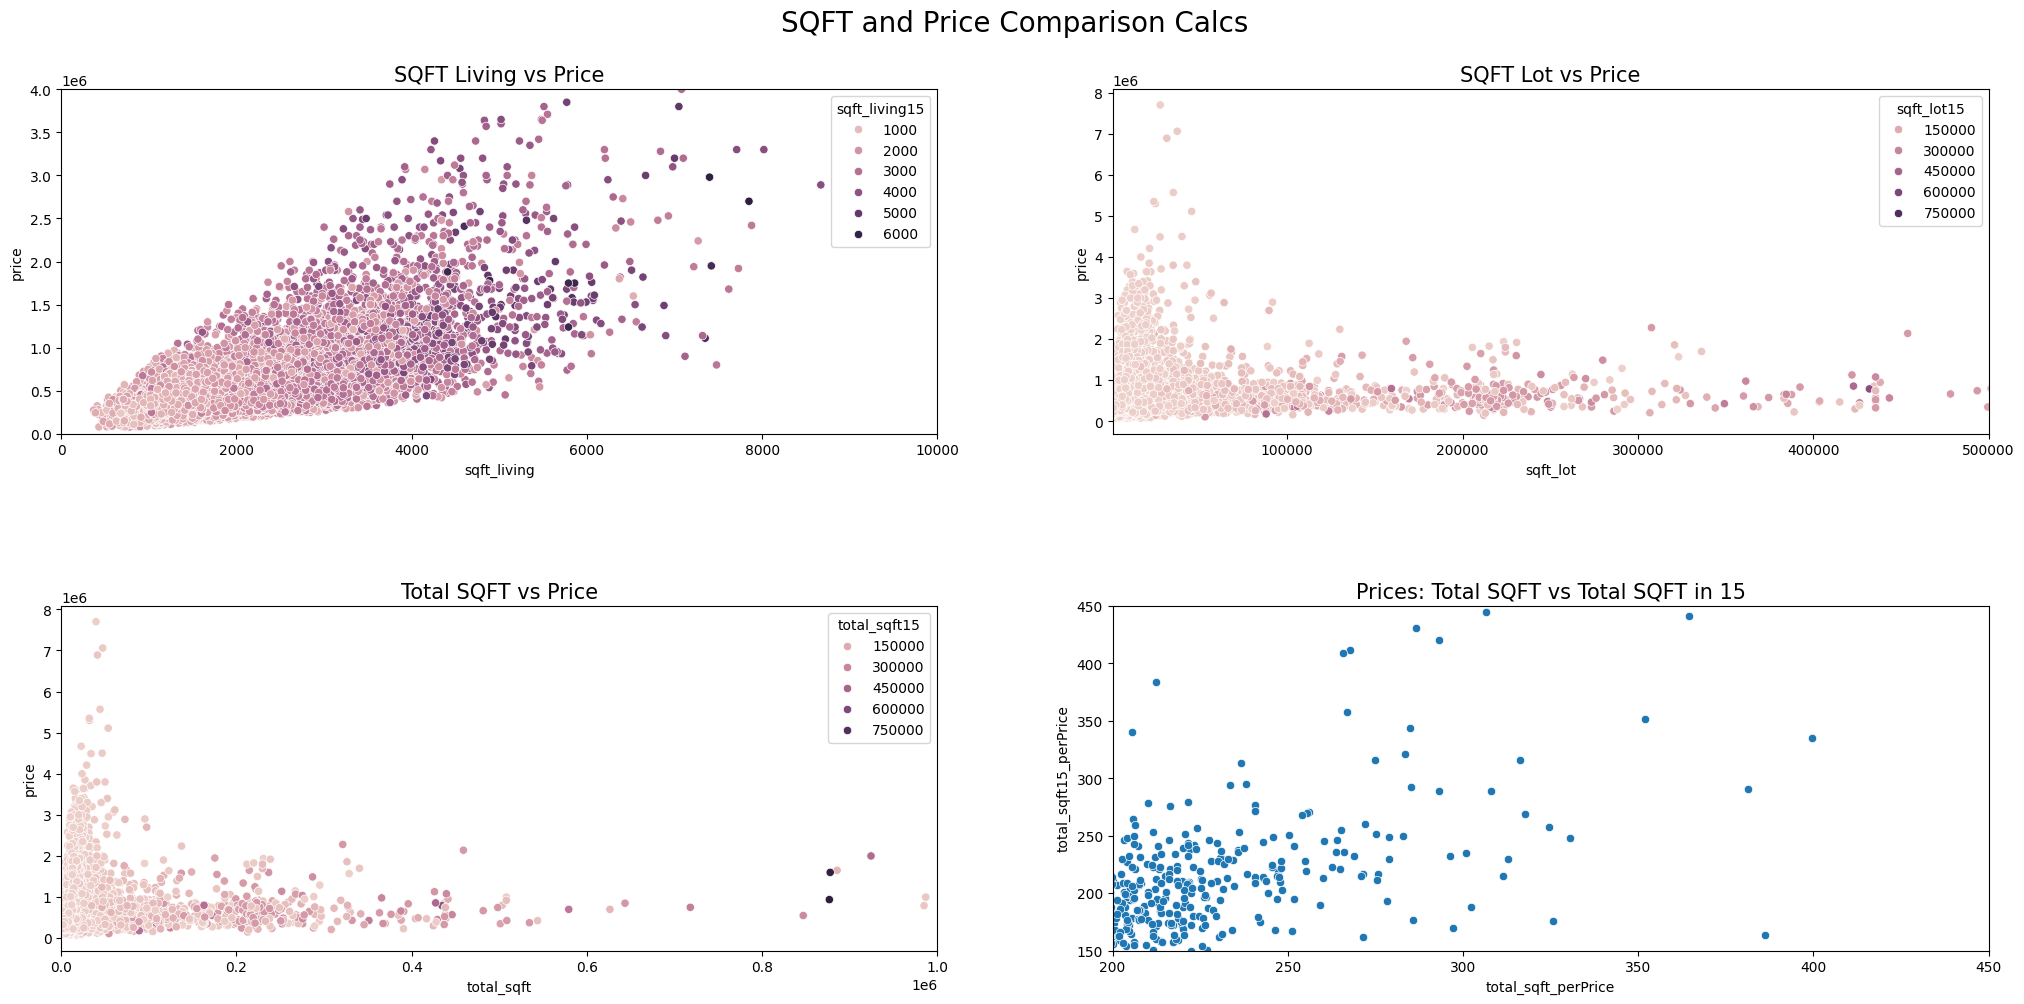

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(20,10)) # create subplots on 2 rows and 2 columns
plt.suptitle('SQFT and Price Comparison Calcs', fontsize=20)
fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots

sns.scatterplot(data=df, x='sqft_living', y='price', hue='sqft_living15', ax=ax[0][0]) # creates boxplot for number of views
ax[0][0].set_ylim(0,4000000) # limits the y-axis values from 0 to 2000000 
ax[0][0].set_xlim(0,10000)
ax[0][0].set_title("SQFT Living vs Price", fontsize = 15); # sets title for subplot

sns.scatterplot(data=df, x='sqft_lot', y='price', hue='sqft_lot15', ax=ax[0][1]) # creates boxplot for number of views
#ax[0][1].set_ylim(0,5000000) # limits the y-axis values from 0 to 2000000 
ax[0][1].set_xlim(400,500000)
ax[0][1].set_title("SQFT Lot vs Price", fontsize = 15); # sets title for subplot

sns.scatterplot(data=df, x='total_sqft', y='price', hue='total_sqft15', ax=ax[1][0]) # creates boxplot for number of views
#ax[1][0].set_ylim(0,2000000) # limits the y-axis values from 0 to 2000000 
ax[1][0].set_xlim(0,1000000)
ax[1][0].set_title("Total SQFT vs Price", fontsize = 15); # sets title for subplot

## Need to uncomment and run this on reload
#df['total_sqft_perPrice'] = df['price'] / df['total_sqft']
#df['total_sqft15_perPrice'] = df['price'] / df['total_sqft15']

sns.scatterplot(data=df, x='total_sqft_perPrice', y='total_sqft15_perPrice', ax=ax[1][1]) # creates boxplot for number of views
ax[1][1].set_ylim(150,450)
ax[1][1].set_xlim(200,450)
ax[1][1].set_title("Prices: Total SQFT vs Total SQFT in 15", fontsize = 15); # sets title for subplot


#fig.delaxes(ax[1][2]);

(0.0, 200.0)

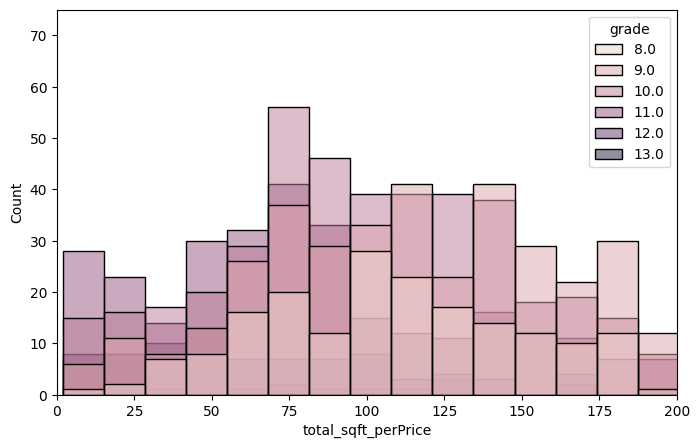

In [67]:

#sns.histplot(data=df, x=df['total_sqft_perPrice'], hue='grade')
#plt.ylim(0,1000)
#plt.xlim(0,200)

# Creating a grade + price filter, choosing above 7 and prices less than 1 million
grade_price_filtered = df[(df['grade'] > 7) & (df['price'] > 1000000)]



sns.histplot(data=grade_price_filtered, x=df['total_sqft_perPrice'], hue='grade')
plt.ylim(0,75)
plt.xlim(0,200)

# Count is now 1430 entries
#grade_price_filtered.describe()

#grade_price_filtered.info()



In [68]:
## Thinking about dates... The houses that have been on the market for some time are perhaps looking to lower their price for the right buyer


## DONT USE THIS STUFF YET ###


#grade_price_filtered = grade_price_filtered['date'].sort_values().reset_index(name='date')
#grade_price_filtered.drop(["index"], axis=1, inplace=True)

#grade_price_filtered['date']

# Switching to Date Time in the column
#grade_price_filtered["date"] = pd.to_datetime(grade_price_filtered["date"])

#grade_price_filtered['year'] = grade_price_filtered['date'].dt.year
#grade_price_filtered['month'] = grade_price_filtered['date'].dt.month
#grade_price_filtered['day'] = grade_price_filtered['date'].dt.day
#grade_price_filtered['weekday'] = grade_price_filtered['date'].dt.dayofweek

## This DF is 1430 entries, 
grade_price_filtered



,date,price,house_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,total_roooms,total_sqft,total_sqft15,total_sqft_perPrice,total_sqft15_perPrice
5,2014-05-12,1230000,7237550310,4,4,5420,101930,1,0,0,...,98053,47.656,-122.005,4760,101930,8,107350,106690,11.458,11.529
21,2014-08-26,2000000,2524049179,3,2,3050,44867,1,0,4,...,98040,47.532,-122.233,4110,20336,5,47917,24446,41.739,81.813
49,2015-03-11,1350000,822039084,3,2,2753,65005,1,1,2,...,98070,47.404,-122.451,2680,72513,5,67758,75193,19.924,17.954
69,2014-06-12,1330000,1802000060,5,2,3200,20158,1,0,0,...,98004,47.630,-122.215,3390,20158,7,23358,23548,56.940,56.480
70,2014-09-12,1040000,1525059190,5,3,4770,50094,1,0,0,...,98005,47.653,-122.160,3530,38917,8,54864,42447,18.956,24.501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21574,2014-05-14,1220000,7430200100,4,3,4910,9444,1,0,0,...,98074,47.650,-122.066,4560,11063,7,14354,15623,84.994,78.090
21577,2015-03-17,1090000,8672200110,5,3,4170,8142,2,0,2,...,98056,47.535,-122.181,3030,7980,8,12312,11010,88.532,99.001
21581,2015-04-21,1580000,191100405,4,3,3410,10125,2,0,0,...,98040,47.565,-122.223,2290,10125,7,13535,12415,116.734,127.265
21584,2014-10-15,1540000,249000205,5,3,4470,8088,2,0,0,...,98004,47.632,-122.200,2780,8964,8,12558,11744,122.631,131.131


In [ ]:
"""
sorted_selection['price'].describe()

sns.histplot(data=sorted_selection, x=df['total_sqft_perPrice'], hue='grade')
plt.ylim(0,400)
plt.xlim(0,45)
#df['total_sqft_perPrice']

"""

In [ ]:
#df['total_sqft15'] = df['sqft_living15'] + df['sqft_lot15']

#narrow_selection = sorted_selection['total_sqft_perPrice']

#narrow_selection.info()

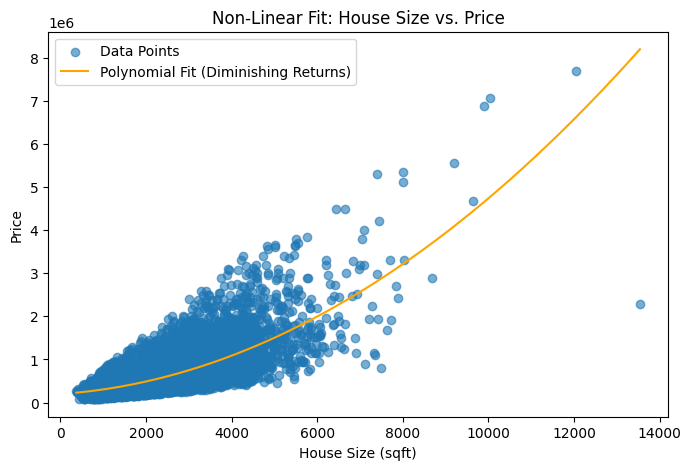

In [69]:


x = df['sqft_living'].values
y = df['price'].values

# Fit polynomial regression (degree=2 for curvature)
coeffs = np.polyfit(x, y, 2)  # Returns coefficients of the polynomial
poly_eq = np.poly1d(coeffs)   # Create a polynomial equation object

# Predict values for plotting
x_pred = np.linspace(x.min(), x.max(), 500)
y_pred = poly_eq(x_pred)

# Plot
plt.scatter(x, y, label='Data Points', alpha=0.6)
plt.plot(x_pred, y_pred, color='orange', label='Polynomial Fit (Diminishing Returns)')
plt.title('Non-Linear Fit: House Size vs. Price')
plt.xlabel('House Size (sqft)')
plt.ylabel('Price')
plt.legend()
plt.show()

In [70]:
## Determine the distance from Seattle city centre
seattle_lat, seattle_long = 47.608013, -122.335167

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in km
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    a = sin(dlat/2) * sin(dlat/2) + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon/2) * sin(dlon/2)
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    return R * c


# Normalize values and get ready to plug them into weight calculation
df['distance_from_center'] = df.apply(
    lambda row: haversine(row['lat'], row['long'], seattle_lat, seattle_long), axis=1
)
df['distance_score'] = 1 - (df['distance_from_center'] / df['distance_from_center'].max())  # Normalize to 0-1

"""
price_range = (300000, 600000)  # Example middle price range
df['price_score'] = df['price'].apply(
    lambda x: 1 if price_range[0] <= x <= price_range[1] else 0
)
"""

df['sqft_per_price'] = df['sqft_living'] / df['price']

df['price_score'] = (df['sqft_per_price'] - df['sqft_per_price'].min()) / (df['sqft_per_price'].max() - df['sqft_per_price'].min())




"""
df['timing_score'] = df['date'].apply(
    lambda date: 1 if (pd.to_datetime(date) - pd.Timestamp.now()).days <= 365 else 0
)
"""

df['condition_grade_score'] = (df['condition'] + df['grade']) / (df['condition'].max() + df['grade'].max())

# Combine weighted scores
weights = {
    'distance_score': 0.4,
    'price_score': 0.3,
    #'timing_score': 0.2,
    'condition_grade_score': 0.1
}

df['suitability_score'] = (
    df['distance_score'] * weights['distance_score'] +
    df['price_score'] * weights['price_score'] +
    #df['timing_score'] * weights['timing_score'] +
    df['condition_grade_score'] * weights['condition_grade_score']
)

df


,date,price,house_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,total_sqft,total_sqft15,total_sqft_perPrice,total_sqft15_perPrice,distance_from_center,distance_score,sqft_per_price,price_score,condition_grade_score,suitability_score
0,2014-10-13,221900,7129300520,3,1,1180,5650,1,0,0,...,6830,6990,32.489,31.745,12.259,0.841,0.005,0.401,0.556,0.512
1,2014-12-09,538000,6414100192,3,2,2570,7242,2,0,0,...,9812,9329,54.831,57.670,12.622,0.837,0.005,0.348,0.556,0.495
2,2015-02-25,180000,5631500400,2,1,770,10000,1,0,0,...,10770,10782,16.713,16.694,16.344,0.789,0.004,0.299,0.500,0.455
3,2014-12-09,604000,2487200875,4,3,1960,5000,1,0,0,...,6960,6360,86.782,94.969,10.624,0.863,0.003,0.197,0.667,0.471
4,2015-02-18,510000,1954400510,3,2,1680,8080,1,0,0,...,9760,9303,52.254,54.821,21.773,0.718,0.003,0.202,0.611,0.409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000,263000018,3,2,1530,1131,3,0,0,...,2661,3039,135.287,118.460,10.183,0.868,0.004,0.296,0.611,0.497
21593,2015-02-23,400000,6600060120,4,2,2310,5813,2,0,0,...,8123,9030,49.243,44.297,11.006,0.858,0.006,0.446,0.611,0.538
21594,2014-06-23,402101,1523300141,2,0,1020,1350,2,0,0,...,2370,3027,169.663,132.838,3.106,0.960,0.003,0.128,0.556,0.478
21595,2015-01-16,400000,291310100,3,2,1600,2388,2,0,0,...,3988,2697,100.301,148.313,21.576,0.721,0.004,0.272,0.611,0.431


In [80]:
#print(df['suitability_score'])

#top_properties = df.sort_values(by='suitability_score', ascending=False).head(10)

#top_properties  
#grade_price_filtered

# Check if house_id from top_properties exists in grade_price_filtered
#top_properties_in_filtered = top_properties[top_properties['house_id'].isin(grade_price_filtered['house_id'])]

# Display the results
print(top_properties)






#top_properties
#df.describe()

             date   price    house_id  bedrooms  bathrooms  sqft_living  \
21170  2015-01-14  303500  7896300592         6          4         3390   
1383   2015-01-23  250000  3342700465         3          1         2840   
21356  2014-05-20  490000  6169901185         5          3         4460   
3781   2014-05-23  149000   723049156         3          1         1700   
3197   2015-02-24  178000     3800008         5          1         1990   
3536   2014-06-10  175000  1823049202         6          1         1930   
13107  2014-09-10  419000  6453300306         7          3         4340   
15796  2014-12-20  133000  7129304540         5          2         1430   
11920  2014-12-08  104950   723049326         2          1         1170   
12894  2014-06-27  315000  2113700360         6          4         3120   

       sqft_lot  floors  waterfront  view  ...  total_sqft  total_sqft15  \
21170      7200       2           0     0  ...       10590          9254   
1383      10182       

In [ ]:
"""
# Combine house_id from both DataFrames
combined_house_ids = pd.concat([grade_price_filtered['house_id'], top_properties['house_id']])

# Count the unique values
unique_count = combined_house_ids.nunique()

# Optionally, get the unique house_ids as a list
unique_house_ids = combined_house_ids.unique()

# Display the result
#print(f"Number of unique house_ids: {unique_count}")

grade_price_filtered
#top_properties

"""


,date,price,house_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,total_roooms,total_sqft,total_sqft15,total_sqft_perPrice,total_sqft15_perPrice
5,2014-05-12,1230000,7237550310,4,4,5420,101930,1,0,0,...,98053,47.656,-122.005,4760,101930,8,107350,106690,11.458,11.529
21,2014-08-26,2000000,2524049179,3,2,3050,44867,1,0,4,...,98040,47.532,-122.233,4110,20336,5,47917,24446,41.739,81.813
49,2015-03-11,1350000,822039084,3,2,2753,65005,1,1,2,...,98070,47.404,-122.451,2680,72513,5,67758,75193,19.924,17.954
69,2014-06-12,1330000,1802000060,5,2,3200,20158,1,0,0,...,98004,47.630,-122.215,3390,20158,7,23358,23548,56.940,56.480
70,2014-09-12,1040000,1525059190,5,3,4770,50094,1,0,0,...,98005,47.653,-122.160,3530,38917,8,54864,42447,18.956,24.501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21574,2014-05-14,1220000,7430200100,4,3,4910,9444,1,0,0,...,98074,47.650,-122.066,4560,11063,7,14354,15623,84.994,78.090
21577,2015-03-17,1090000,8672200110,5,3,4170,8142,2,0,2,...,98056,47.535,-122.181,3030,7980,8,12312,11010,88.532,99.001
21581,2015-04-21,1580000,191100405,4,3,3410,10125,2,0,0,...,98040,47.565,-122.223,2290,10125,7,13535,12415,116.734,127.265
21584,2014-10-15,1540000,249000205,5,3,4470,8088,2,0,0,...,98004,47.632,-122.200,2780,8964,8,12558,11744,122.631,131.131


In [83]:
## Determine the distance from Seattle city centre
seattle_lat, seattle_long = 47.608013, -122.335167

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in km
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    a = sin(dlat/2) * sin(dlat/2) + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon/2) * sin(dlon/2)
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    return R * c


# Normalize values and get ready to plug them into weight calculation
grade_price_filtered['distance_from_center'] = grade_price_filtered.apply(
    lambda row: haversine(row['lat'], row['long'], seattle_lat, seattle_long), axis=1
)

grade_price_filtered['distance_score'] = 1 - (grade_price_filtered['distance_from_center'] / grade_price_filtered['distance_from_center'].max())  # Normalize to 0-1

"""
price_range = (300000, 600000)  # Example middle price range
df['price_score'] = df['price'].apply(
    lambda x: 1 if price_range[0] <= x <= price_range[1] else 0
)
"""

grade_price_filtered['sqft_per_price'] = grade_price_filtered['sqft_living'] / grade_price_filtered['price']

grade_price_filtered['price_score'] = (grade_price_filtered['sqft_per_price'] - grade_price_filtered['sqft_per_price'].min()) / (grade_price_filtered['sqft_per_price'].max() - grade_price_filtered['sqft_per_price'].min())




"""
df['timing_score'] = df['date'].apply(
    lambda date: 1 if (pd.to_datetime(date) - pd.Timestamp.now()).days <= 365 else 0
)
"""

grade_price_filtered['condition_grade_score'] = (grade_price_filtered['condition'] + grade_price_filtered['grade']) / (grade_price_filtered['condition'].max() + grade_price_filtered['grade'].max())

# Combine weighted scores
weights = {
    'distance_score': 0.5,
    'price_score': 0.3,
    #'timing_score': 0.2,
    'condition_grade_score': 0.2
}

grade_price_filtered['suitability_score'] = (
    grade_price_filtered['distance_score'] * weights['distance_score'] +
    grade_price_filtered['price_score'] * weights['price_score'] +
    grade_price_filtered['condition_grade_score'] * weights['condition_grade_score']
)




In [84]:
#grade_price_filtered

top_properties_gp_filtered = grade_price_filtered.sort_values(by='suitability_score', ascending=False).head(10)

top_houses_presentation = df[['house_id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','floors','waterfront','view', 'distance_score', 'sqft_per_price', 'suitability_score']]

#print(top_houses_presentation)

#top_properties_gp_filtered.columns

df.columns


Index(['date', 'price', 'house_id', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'total_roooms',
       'total_sqft', 'total_sqft15', 'total_sqft_perPrice',
       'total_sqft15_perPrice', 'distance_from_center', 'distance_score',
       'sqft_per_price', 'price_score', 'condition_grade_score',
       'suitability_score'],
      dtype='object')

In [85]:
# Exporting the current top houses into a CSV file

csv_path = 'data/top_houses_presentation.csv'
top_houses_presentation.to_csv(csv_path, index=False)

In [86]:
## HYPOTHESIS 1
## Places within the city will be smaller and cost more than houses away from the centre, which will be bigger and cost less

# CALCULATING PRICE VS DISTANCE

## DISTANCE CALC

# Seattle Center coordinates
seattle_lat, seattle_long = 47.608013, -122.335167

# Function to calculate distance using Haversine formula
def haversine(lat1, lon1, lat2, lon2):
    # Radius of Earth in km
    R = 6371.0
    
    # Convert degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    
    # Differences in coordinates
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    # Haversine formula
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
    # Distance in km
    distance = R * c
    return distance


# Calculate distance to Seattle center for each house
df['distance_to_seattle'] = df.apply(lambda row: haversine(row['lat'], row['long'], seattle_lat, seattle_long), axis=1)



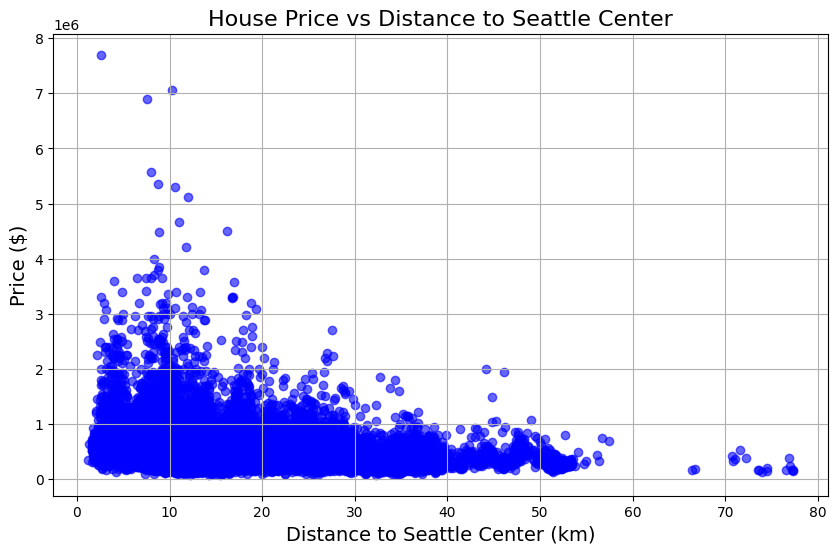

In [87]:
# Scatter plot for price vs distance to Seattle center
plt.figure(figsize=(10, 6))
plt.scatter(df['distance_to_seattle'], df['price'], color='blue', alpha=0.6)

# Set labels and title
plt.title("House Price vs Distance to Seattle Center", fontsize=16)
plt.xlabel("Distance to Seattle Center (km)", fontsize=14)
plt.ylabel("Price ($)", fontsize=14)

# Show grid and plot
plt.grid(True)
plt.show()


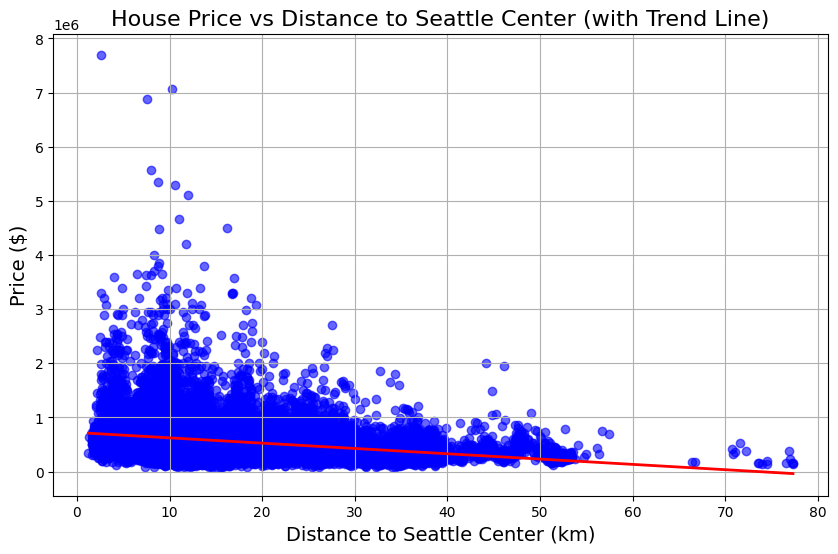

In [88]:
## REGRESSION


# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='distance_to_seattle', y='price', data=df, scatter_kws={'color': 'blue', 'alpha': 0.6}, line_kws={'color': 'red', 'linewidth': 2})

# Set labels and title
plt.title("House Price vs Distance to Seattle Center (with Trend Line)", fontsize=16)
plt.xlabel("Distance to Seattle Center (km)", fontsize=14)
plt.ylabel("Price ($)", fontsize=14)

# Show grid and plot
plt.grid(True)
plt.show()

In [90]:
## Creating a normalized sqft value to use as a hue

df['sqft_living_normalized'] = (df['sqft_living'] - df['sqft_living'].min()) / (df['sqft_living'].max() - df['sqft_living'].min())

# Show the DataFrame to verify the new normalized column
print(df[['house_id', 'sqft_living', 'sqft_living_normalized']])

         house_id  sqft_living  sqft_living_normalized
0      7129300520         1180                   0.062
1      6414100192         2570                   0.167
2      5631500400          770                   0.030
3      2487200875         1960                   0.121
4      1954400510         1680                   0.099
...           ...          ...                     ...
21592   263000018         1530                   0.088
21593  6600060120         2310                   0.147
21594  1523300141         1020                   0.049
21595   291310100         1600                   0.093
21596  1523300157         1020                   0.049

[21597 rows x 3 columns]


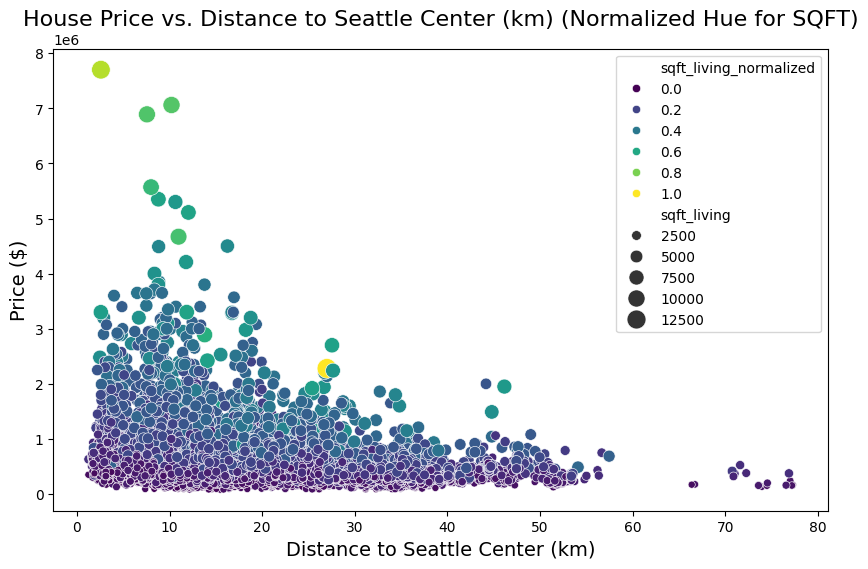

In [91]:
## Adding the HUE


# Create a scatter plot using seaborn with the normalized 'sqft_living' as the hue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='distance_to_seattle', y='price', hue='sqft_living_normalized', palette='viridis', size='sqft_living', sizes=(20, 200))

# Add labels and title
plt.title("House Price vs. Distance to Seattle Center (km) (Normalized Hue for SQFT)", fontsize=16)
plt.xlabel("Distance to Seattle Center (km)", fontsize=14)
plt.ylabel("Price ($)", fontsize=14)

# Show the plot
plt.show()


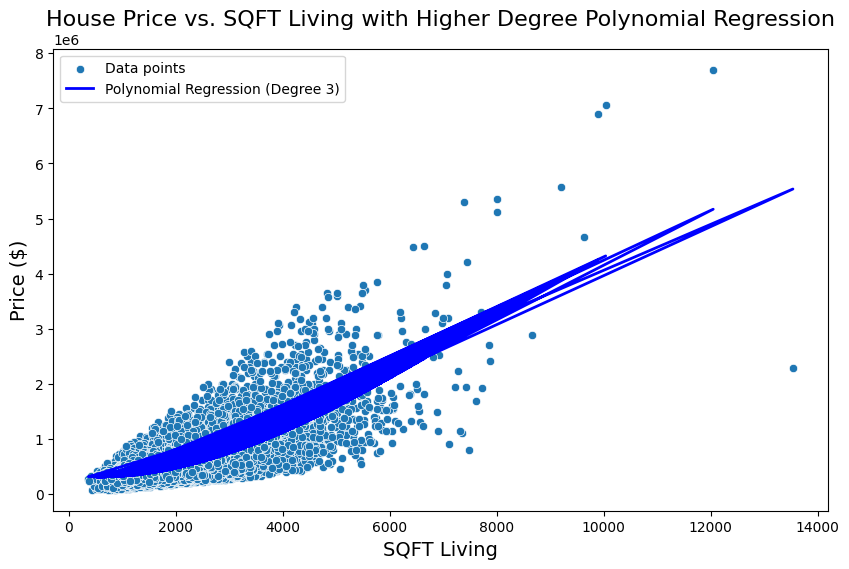

In [96]:
# For a higher degree polynomial (e.g., degree=3)
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# Fit the model
model.fit(X_poly, y)

# Predict
y_poly_pred = model.predict(X_poly)

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='sqft_living', y='price', label="Data points")
plt.plot(df['sqft_living'], y_poly_pred, color='blue', label="Polynomial Regression (Degree 3)", linewidth=2)

# Add labels and title
plt.title("House Price vs. SQFT Living with Higher Degree Polynomial Regression", fontsize=16)
plt.xlabel("SQFT Living", fontsize=14)
plt.ylabel("Price ($)", fontsize=14)
plt.legend()

# Show plot
plt.show()


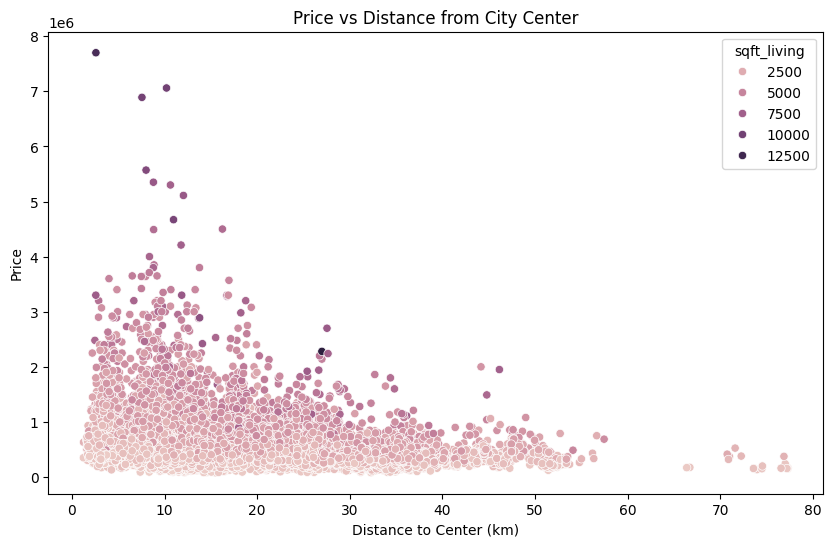

"\n# Plot Square Footage vs. Distance\nplt.figure(figsize=(10, 6))\nsns.scatterplot(x='distance_to_seattle', y='sqft_living', data=df)\nplt.title('Square Footage vs Distance from City Center')\nplt.xlabel('Distance to Center (km)')\nplt.ylabel('Square Footage')\nplt.show()\n\n"

In [97]:

# Plot Price vs. Distance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance_to_seattle', y='price', hue='sqft_living', data=df)
plt.title('Price vs Distance from City Center')
plt.xlabel('Distance to Center (km)')
plt.ylabel('Price')
plt.show()

"""
# Plot Square Footage vs. Distance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance_to_seattle', y='sqft_living', data=df)
plt.title('Square Footage vs Distance from City Center')
plt.xlabel('Distance to Center (km)')
plt.ylabel('Square Footage')
plt.show()

"""


In [98]:
# Calculate correlation between price and distance
price_distance_corr = df['price'].corr(df['distance_to_seattle'])
print(f'Correlation between price and distance: {price_distance_corr}')

# Calculate correlation between sqft_living and distance
sqft_distance_corr = df['sqft_living'].corr(df['distance_to_seattle'])
print(f'Correlation between sqft_living and distance: {sqft_distance_corr}')





Correlation between price and distance: -0.2864763687636491
Correlation between sqft_living and distance: 0.07577580001819821


'\nA negative correlation between price and distance would support the claim that \nproperties near the city center are more expensive.\n\nA positive correlation between square footage and distance would support the idea that \nlarger homes are found farther from the city center.\n\nCorrelation between price and distance: -0.2864763687636491\nCorrelation between sqft_living and distance: 0.07577580001819821\n\n'

A negative correlation between price and distance supports the claim that properties near the city center are more expensive.
Correlation between price and distance: -0.2864763687636491

A positive correlation between square footage and distance supports the idea that larger homes are found farther from the city center.
Correlation between sqft_living and distance: 0.07577580001819821




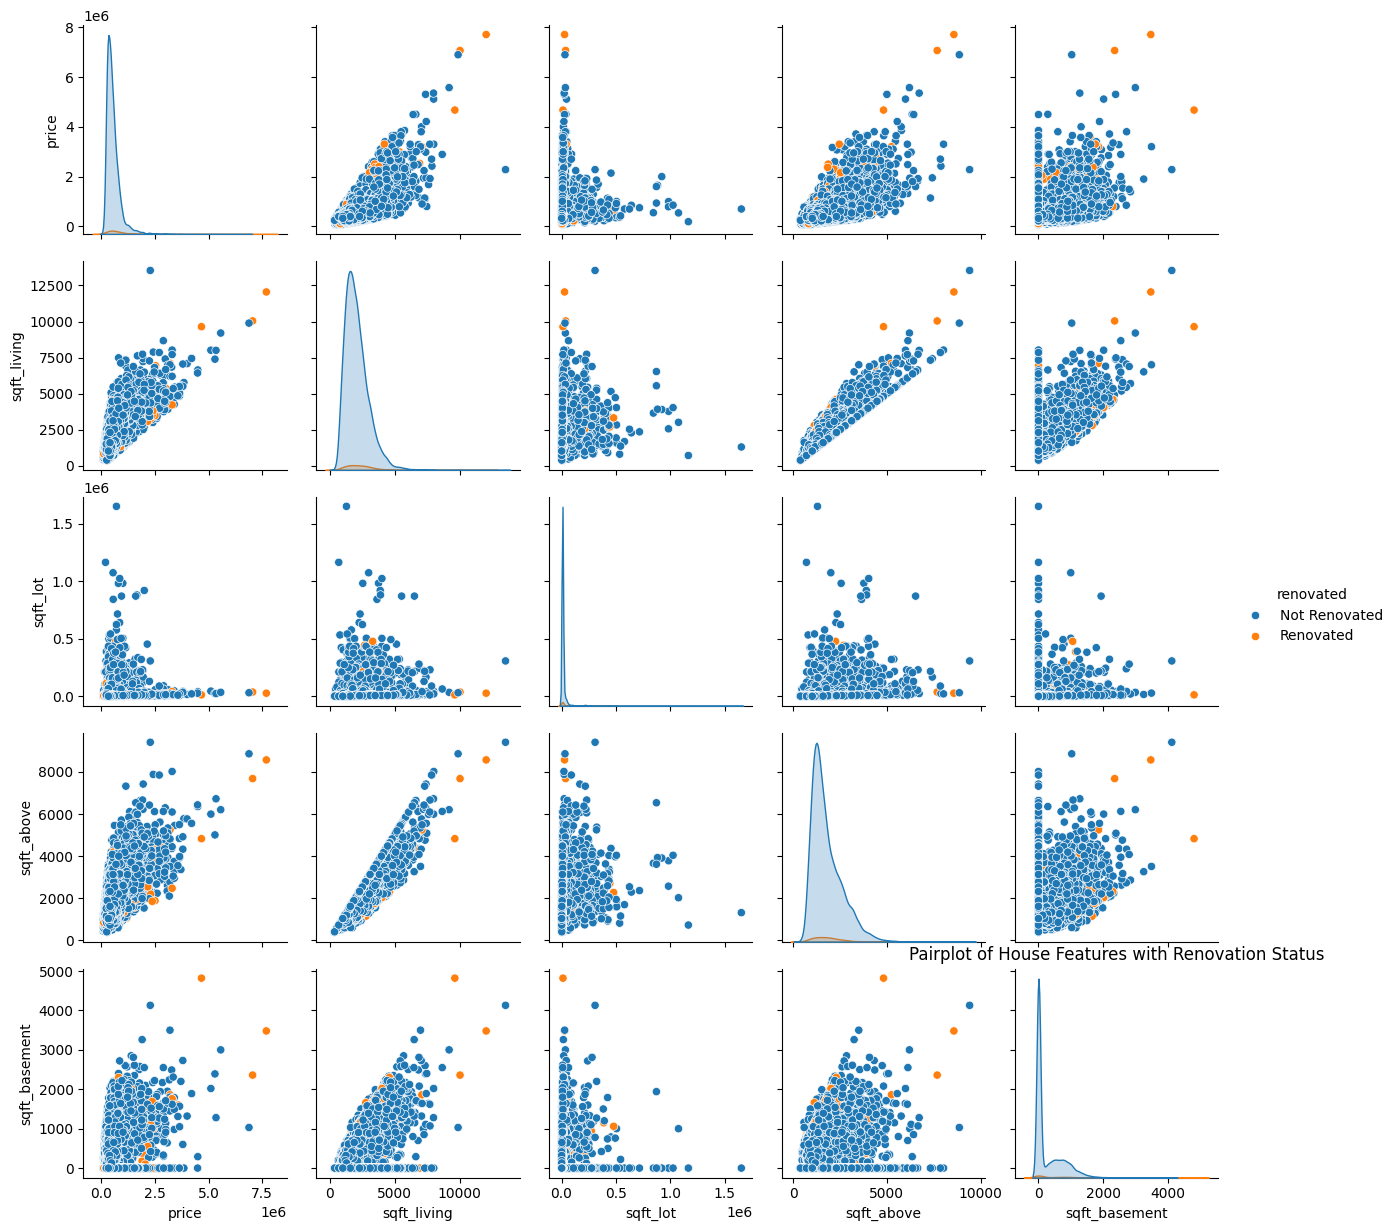

In [ ]:
## Hypothesis 2
##Houses that have renovated will sell at a higher price


# Create a new column to categorize houses
df['renovated'] = df['yr_renovated'].notnull() & (df['yr_renovated'] > df['yr_built'])
df['renovated'] = df['renovated'].replace({True: 'Renovated', False: 'Not Renovated'})


sns.pairplot(df[['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'renovated']], hue='renovated')
plt.title('Pairplot of House Features with Renovation Status')
plt.show()




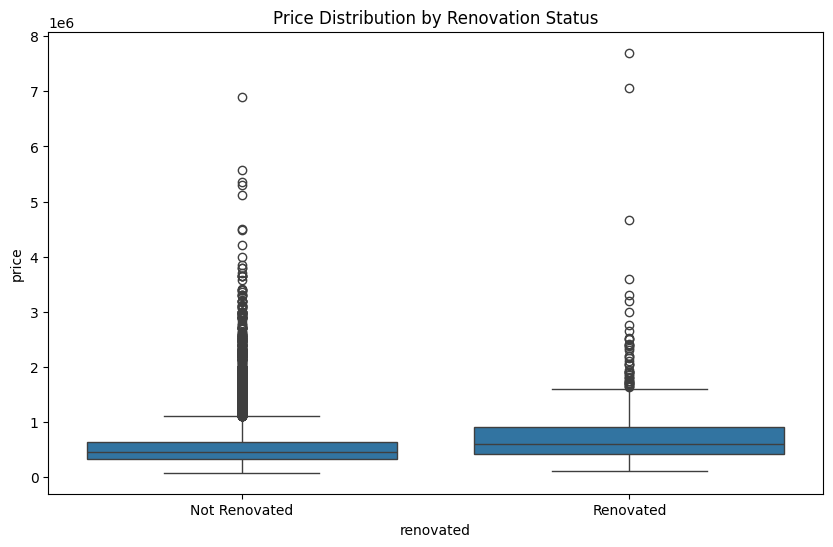

In [110]:
# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='renovated', y='price', data=df)
plt.title('Price Distribution by Renovation Status')
plt.show()

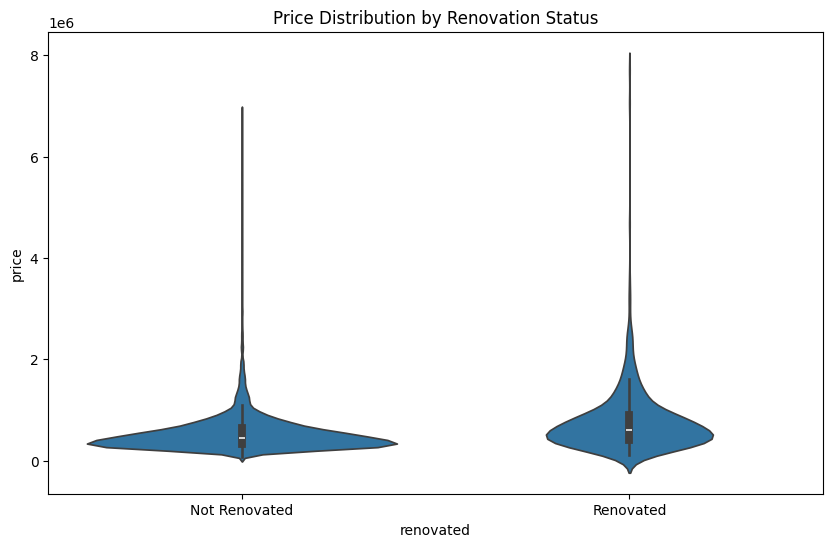

In [100]:
# Trying Violin plot

plt.figure(figsize=(10, 6))
sns.violinplot(x='renovated', y='price', data=df)
plt.title('Price Distribution by Renovation Status')
plt.show()

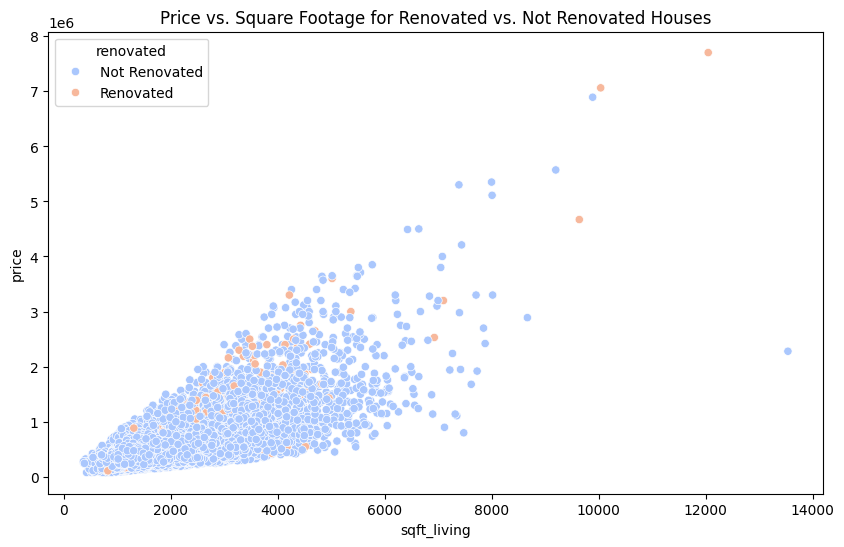

In [101]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', hue='renovated', data=df, palette='coolwarm')
plt.title('Price vs. Square Footage for Renovated vs. Not Renovated Houses')
plt.show()


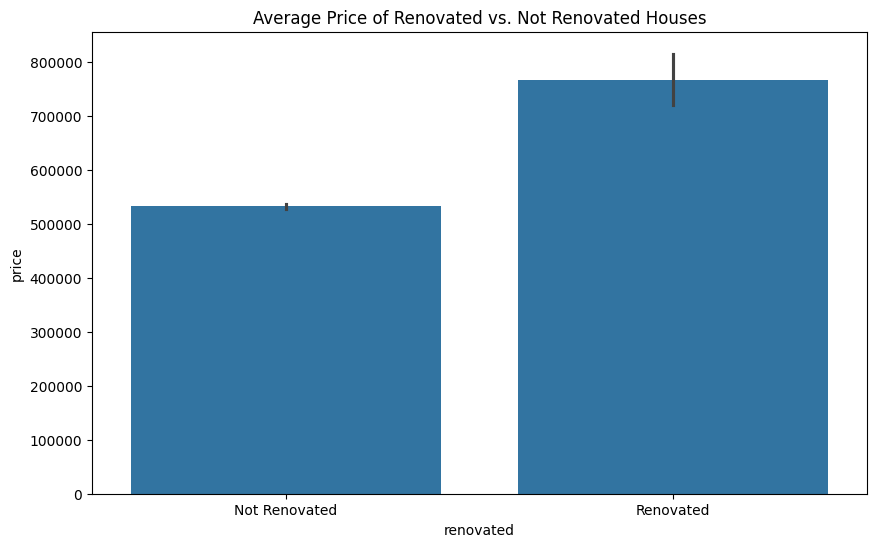

In [102]:
# Calculate the mean price for each renovation status
plt.figure(figsize=(10, 6))
sns.barplot(x='renovated', y='price', data=df, estimator='mean')
plt.title('Average Price of Renovated vs. Not Renovated Houses')
plt.show()


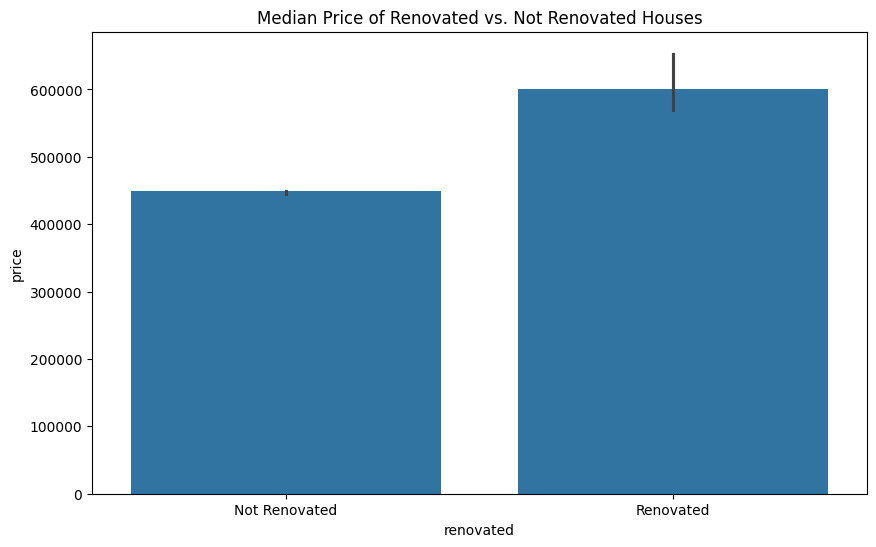

In [103]:
# Calculate the median price for each renovation status
plt.figure(figsize=(10, 6))
sns.barplot(x='renovated', y='price', data=df, estimator='median')
plt.title('Median Price of Renovated vs. Not Renovated Houses')
plt.show()


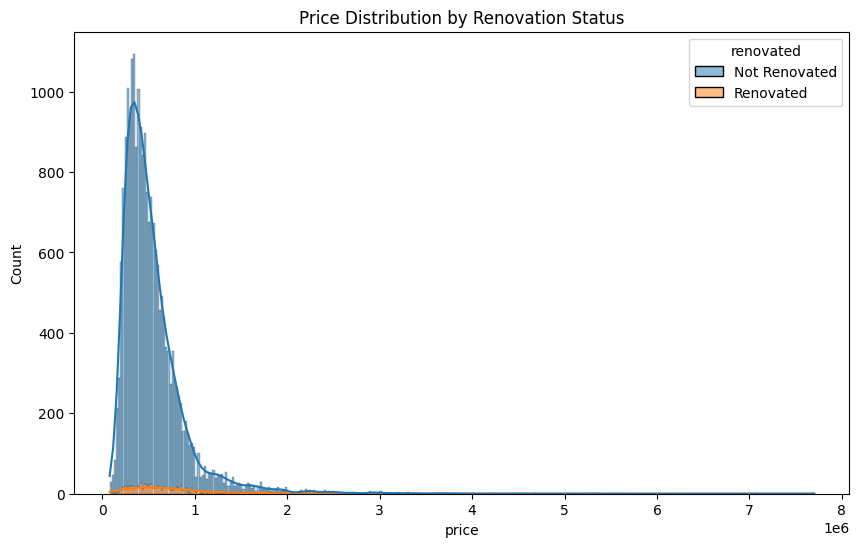

In [104]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='price', hue='renovated', kde=True, multiple='stack')
plt.title('Price Distribution by Renovation Status')
plt.show()


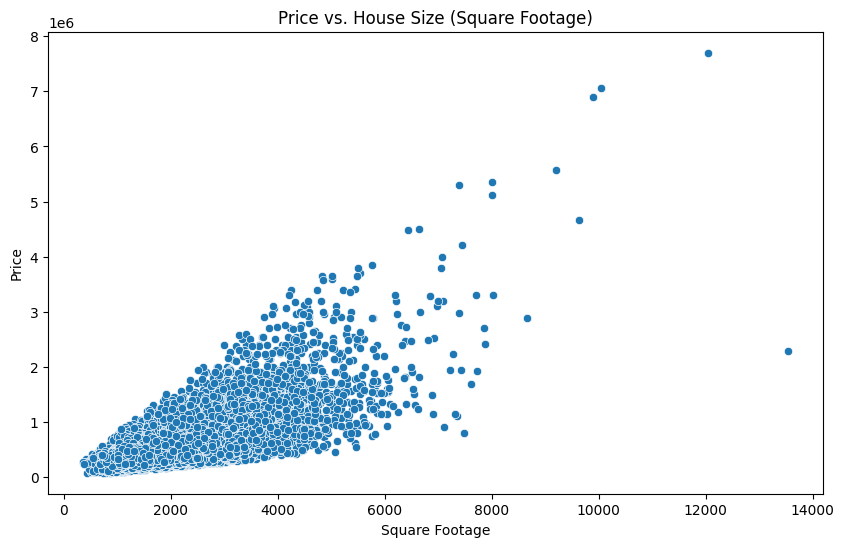

In [106]:
## HYPOTHESIS 3
## House size will have diminishing returns on its price

# Create a scatter plot to show the raw relationship between sqft_living and price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=df)
plt.title('Price vs. House Size (Square Footage)')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.show()



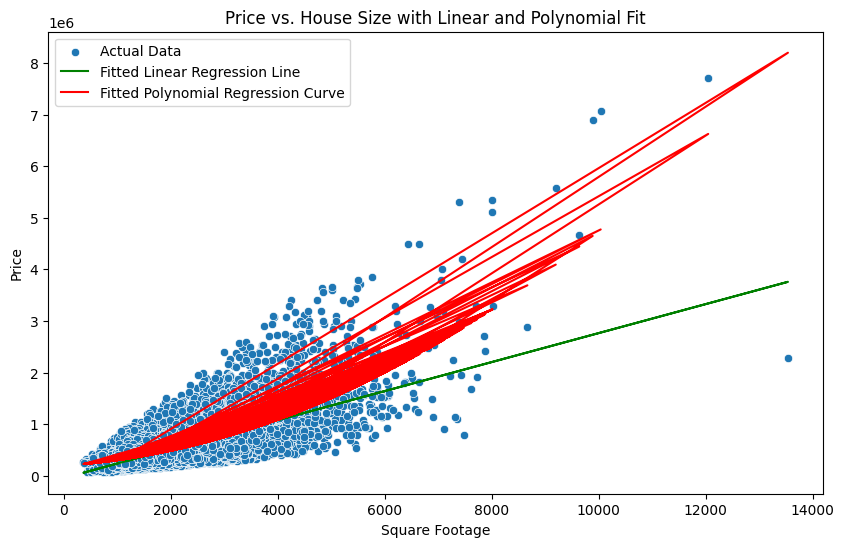

In [25]:
from sklearn.linear_model import LinearRegression

# Fit a simple linear regression model
linear_model = LinearRegression()
linear_model.fit(df[['sqft_living']], df['price'])

# Predict the values
df['price_linear_pred'] = linear_model.predict(df[['sqft_living']])

# Plot the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=df, label='Actual Data')
plt.plot(df['sqft_living'], df['price_linear_pred'], color='green', label='Fitted Linear Regression Line')
plt.plot(df['sqft_living'], df['price_pred'], color='red', label='Fitted Polynomial Regression Curve')
plt.title('Price vs. House Size with Linear and Polynomial Fit')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.legend()
plt.show()


In [136]:
[df.columns]

[Index(['date', 'price', 'house_id', 'bedrooms', 'bathrooms', 'sqft_living',
        'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
        'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
        'lat', 'long', 'sqft_living15', 'sqft_lot15', 'total_roooms',
        'total_sqft', 'total_sqft15', 'total_sqft_perPrice',
        'total_sqft15_perPrice', 'distance_from_center', 'distance_score',
        'price_score', 'timing_score', 'condition_grade_score',
        'suitability_score', 'sqft_per_price'],
       dtype='object')]